In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [10]:
# Loading data
file = "Data/Takout/anonymous_2015.json"
raw = pd.io.json.read_json(file)

In [12]:
# Expand the locations column into a dataframe
# This lets us move down one level in the json structure
df = raw['locations'].apply(pd.Series)

In [13]:
df

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity
0,103,NaN,NaN,NaN,377611139,-1224707537,1468723321167,NaN
1,12,NaN,36.0,NaN,377611139,-1224707537,1468723302999,0.0
2,12,NaN,49.0,NaN,377611139,-1224707537,1468723287999,0.0
3,20,"[{'timestampMs': '1468723265584', 'activity': ...",NaN,NaN,377610871,-1224706561,1468723272489,NaN
4,12,NaN,16.0,NaN,377613962,-1224707777,1468723251000,0.0
5,24,NaN,-2.0,97.0,377614779,-1224708291,1468723235859,0.0
6,8,NaN,53.0,NaN,377611288,-1224706699,1468723213999,0.0
7,8,"[{'timestampMs': '1468723193414', 'activity': ...",45.0,NaN,377611288,-1224706699,1468723197999,0.0
8,113,NaN,NaN,NaN,377613010,-1224708133,1468723182663,NaN
9,12,NaN,43.0,NaN,377613010,-1224708133,1468723163000,0.0


In [14]:
# Create a list from the latitude column, multiplied by -E7
df['latitude'] = df['latitudeE7'] * 0.0000001

In [15]:
# Create a list from the longitude column, multiplied by -E7
df['longitude'] = df['longitudeE7'] * 0.0000001

In [16]:
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

In [17]:
# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

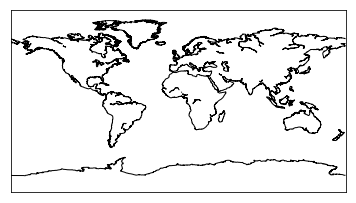

In [18]:
map.drawcoastlines()

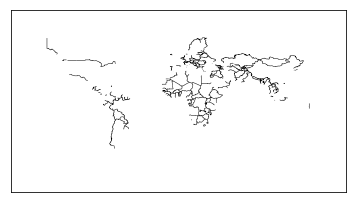

In [19]:
map.drawcountries()

In [21]:
x,y = map(df['longitude'].values, df['latitude'].values)

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


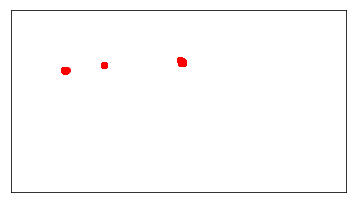

In [22]:
map.plot(x, y, 'ro', markersize=6)

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


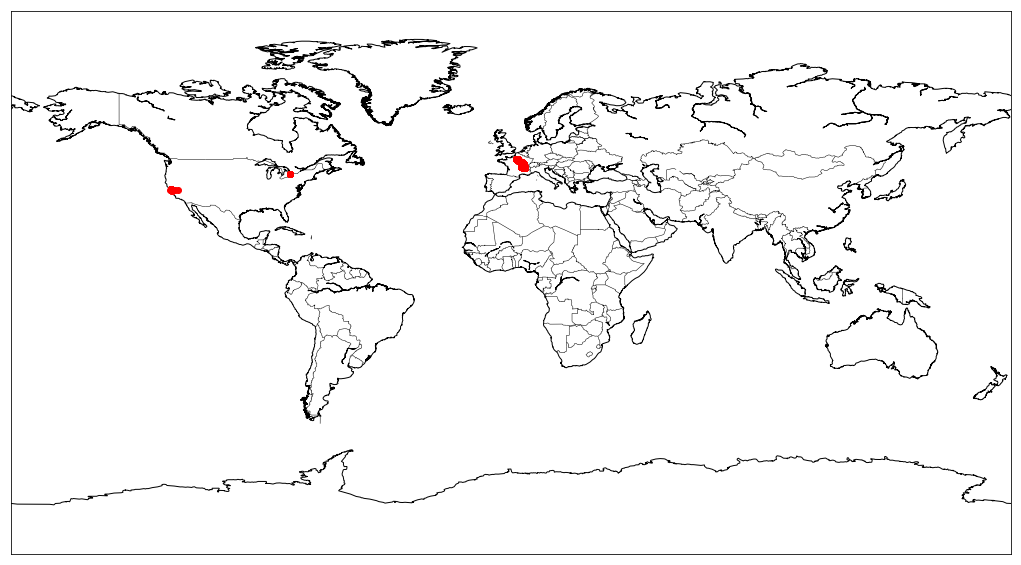

In [38]:
plt.figure(figsize=(20,10))
map.drawcountries()
map.drawcoastlines()
map.plot(x, y, 'ro', markersize=6)